In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pysindy as ps
from scipy.integrate import odeint
from math import pi
from pysindy.differentiation import FiniteDifference
fd = FiniteDifference(order=2, d=1)
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import glob
from sklearn.metrics import mean_absolute_error

(array([-1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,
         1.  ,  1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

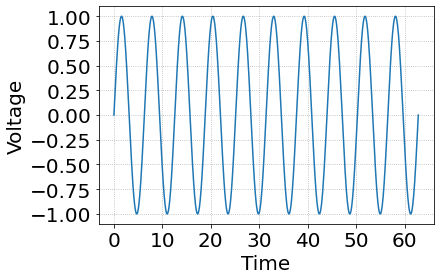

In [2]:
plt.grid(linestyle='dotted')
t = np.linspace(0,20*pi,1000)
x = np.sin(t)
plt.plot(t, x)
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Voltage', fontsize = 20)
#plt.legend(['Actual function' , 'Learned function', 'Training Data'], prop={'size': 16})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_input.png", dpi = 300, bbox_inches='tight')

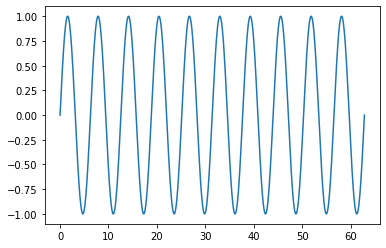

In [3]:
plt.plot(t,x)

In [4]:
dx = fd._differentiate(x, t)

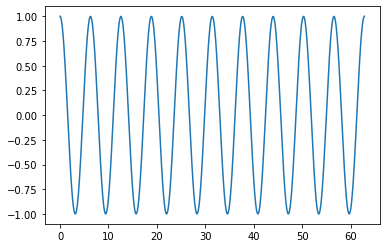

In [5]:
plt.plot(t,dx)

In [6]:
mdx = np.abs(dx)

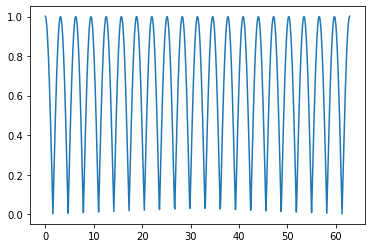

In [7]:
plt.plot(t, mdx)

In [8]:
def model(y, t):
    dydt = np.cos(t) - 0.5*np.abs(np.cos(t))*y - 2*np.cos(t)*np.abs(y)
    return dydt

In [9]:
y0 = 0
y = odeint(model, y0, t)

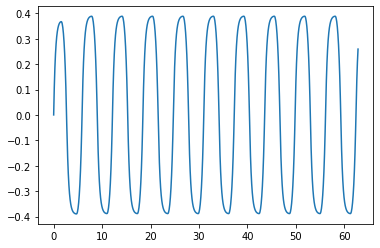

In [10]:
plt.plot(t,y)

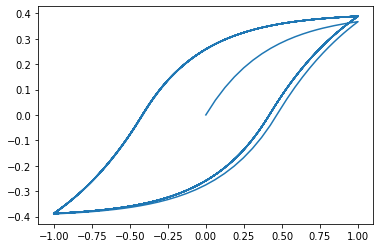

In [11]:
plt.plot(x, y)

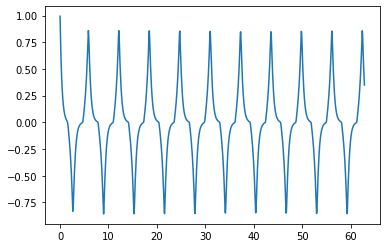

In [12]:
dy = fd._differentiate(y, t)
plt.plot(t, dy)

In [13]:
my = np.abs(y)
my = my.reshape(-1,)

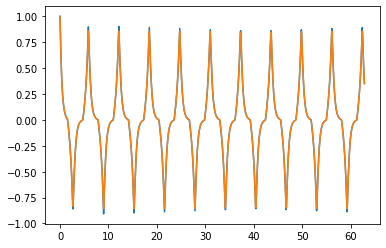

In [14]:
y = y.reshape(-1,)
dy = dy.reshape(-1,)
t1 = dx
t2 = mdx*y
t3 = dx*my
terms = t1-0.5*t2-2*t3
plt.plot(t,terms)
plt.plot(t, dy)

In [15]:
X = np.stack((y, x, dx, mdx, my), axis=-1)

In [16]:
model = ps.SINDy()
model.fit(X,t)
model.print()

(x0)' = 0.995 x2 + -0.504 x0 x3 + -1.976 x2 x4
(x1)' = 1.000 x2
(x2)' = -0.999 x1
(x3)' = -28.140 1 + -11.123 x0 + 6.165 x1 + 0.812 x2 + 2.588 x3 + -18.397 x0^2 + 46.289 x0 x1 + 21.125 x0 x2 + 5.670 x0 x3 + -3.769 x0 x4 + 15.579 x1^2 + -11.812 x1 x2 + -2.016 x1 x3 + -3.309 x1 x4 + 11.637 x2^2 + 1.338 x2 x3 + -1.860 x2 x4 + 11.637 x3^2 + -2.882 x3 x4 + -18.397 x4^2
(x4)' = -9.989 1 + -15.155 x0 + 5.047 x1 + -1.021 x2 + 12.813 x3 + 27.450 x4 + 0.105 x0^2 + -0.383 x0 x1 + 1.083 x0 x2 + 15.074 x0 x3 + -15.962 x0 x4 + -0.702 x1^2 + -0.857 x1 x2 + -5.133 x1 x3 + 8.249 x1 x4 + -1.155 x2^2 + 1.365 x2 x3 + 2.905 x2 x4 + -1.155 x3^2 + -28.803 x3 x4 + 0.105 x4^2


In [17]:
c1 = 0.995
c2 = -0.504
c3 = -1.976
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [18]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

(array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

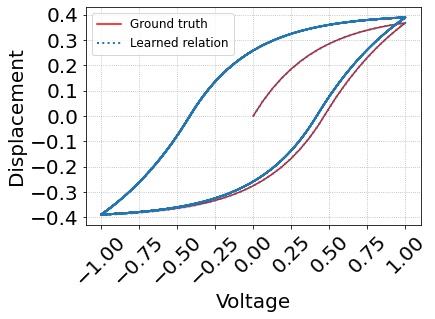

In [19]:
plt.grid(linestyle='dotted')
plt.plot(x, y, 'r')
plt.plot(x, y_test, linewidth=2, linestyle=':')
plt.xlabel('Voltage', fontsize = 20)
plt.ylabel('Displacement', fontsize = 20)
plt.legend(['Ground truth' , 'Learned relation'], loc='upper left', prop={'size': 12})
plt.xticks(fontsize=20, rotation='45')
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_inputvsOutput.png", dpi = 300, bbox_inches='tight')

(array([-1.  , -0.75, -0.5 , -0.25,  0.  ,  0.25,  0.5 ,  0.75,  1.  ,
         1.25]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

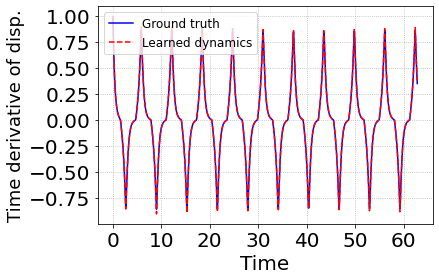

In [20]:
test = c1*t1+c2*t2+c3*t3
plt.plot(t,dy, 'b')
plt.plot(t,test, '--r')
plt.grid(linestyle='dotted')
plt.xlabel('Time', fontsize = 20)
plt.ylabel('Time derivative of disp.', fontsize = 18)
plt.legend(['Ground truth' , 'Learned dynamics'], prop={'size': 12})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
#plt.savefig("Results/test2_Output.jpg", dpi = 300, bbox_inches='tight')

In [21]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test SINDy: ", relative_error_test*100, "%")

Relative Error Test SINDy:  0.00028065442965404474 %


In [22]:
t1=t1.reshape(-1,1)
t2=t2.reshape(-1,1)
t3=t3.reshape(-1,1)
Y = np.concatenate((t1, t2, t3), axis=1)
Y.shape
dy = dy.reshape(-1,1)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [24]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)

[[ 0.88662939 -0.58489993 -1.50794053]]
[0.00037221]


In [25]:
c1 = 0.886
c2 = -0.584
c3 = -1.507
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [26]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [27]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Ridge: ", relative_error_test*100, "%")

Relative Error Test Ridge:  0.09044079413839055 %


In [28]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)

In [29]:
linreg.coef_

array([[ 0.99408925, -0.50450369, -1.97397895]])

In [30]:
linreg.intercept_

array([2.38317305e-05])

In [31]:
c1 = 0.994
c2 = -0.504
c3 = -1.973
def test_model(y, t):
    dydt = c1*np.cos(t) + c2*np.abs(np.cos(t))*y + c3*np.cos(t)*np.abs(y)
    return dydt

In [32]:
ytest_0 = 0
y_test = odeint(test_model, ytest_0, t)

In [33]:
y = y.reshape(-1,1)
# Compute the relative L2 error norm (generalization error)
relative_error_test = np.mean((y_test - y)**2)/np.mean(y**2)
print("Relative Error Test Lin reg: ", relative_error_test*100, "%")

Relative Error Test Lin reg:  0.0003395107835525334 %


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Y, dy, test_size=0.25, random_state=42)

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils
import torch.utils.data
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

In [36]:
# Type of optimizer (ADAM or LBFGS)
opt_type = "LBFGS"
# Random Seed for dataset generation
sampling_seed = 78
torch.manual_seed(sampling_seed)

# Number of training samples
n_samples = 1000

x = X_train
y = y_train
y = y.reshape(-1,1)

x = x.astype(np.float32)
y = y.astype(np.float32)

x = torch.from_numpy(x)
y = torch.from_numpy(y)

batch_size = n_samples
training_set = DataLoader(torch.utils.data.TensorDataset(x, y), batch_size=batch_size, shuffle=True)

In [37]:
class NeuralNet(nn.Module):

    def __init__(self, input_dimension, output_dimension, n_hidden_layers, neurons):
        super(NeuralNet, self).__init__()
        # Number of input dimensions n
        self.input_dimension = input_dimension
        # Number of output dimensions m
        self.output_dimension = output_dimension
        # Number of neurons per layer 
        self.neurons = neurons
        # Number of hidden layers 
        self.n_hidden_layers = n_hidden_layers
        # Activation function 
        self.activation = nn.Tanh()
        
        self.input_layer = nn.Linear(self.input_dimension, self.neurons)
        self.hidden_layers = nn.ModuleList([nn.Linear(self.neurons, self.neurons) for _ in range(n_hidden_layers)])
        self.output_layer = nn.Linear(self.neurons, self.output_dimension)

    def forward(self, x):
        # The forward function performs the set of affine and non-linear transformations defining the network 
        # (see equation above)
        x = self.activation(self.input_layer(x))
        for k, l in enumerate(self.hidden_layers):
            x = self.activation(l(x))
        return self.output_layer(x)

def NeuralNet_Seq(input_dimension, output_dimension, n_hidden_layers, neurons):
    modules = list()
    modules.append(nn.Linear(input_dimension, neurons))
    modules.append(nn.Tanh())
    for _ in range(n_hidden_layers):
        modules.append(nn.Linear(neurons, neurons))
        modules.append(nn.Tanh())
    modules.append(nn.Linear(neurons, output_dimension))
    model =  nn.Sequential(*modules)
    return model

  


In [38]:
# Model definition
my_network = NeuralNet(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)
# my_network = NeuralNet_Seq(input_dimension=x.shape[1], output_dimension=y.shape[1], n_hidden_layers=4, neurons=20)

In [39]:
def init_xavier(model, retrain_seed):
    torch.manual_seed(retrain_seed)
    def init_weights(m):
        if type(m) == nn.Linear and m.weight.requires_grad and m.bias.requires_grad:
            g = nn.init.calculate_gain('tanh')
            torch.nn.init.xavier_uniform_(m.weight, gain=g)
            #torch.nn.init.xavier_normal_(m.weight, gain=g)
            m.bias.data.fill_(0)
    model.apply(init_weights)

# Random Seed for weight initialization
retrain = 128
# Xavier weight initialization
init_xavier(my_network, retrain)
# Model definition

# Predict network value of x
print(my_network(x))

tensor([[-0.2302],
        [-1.0139],
        [-0.8292],
        [-1.0181],
        [-0.8142],
        [-0.6290],
        [-0.8055],
        [-0.7506],
        [-0.6962],
        [-0.8302],
        [ 0.2193],
        [ 0.7130],
        [-0.8949],
        [ 0.7339],
        [ 0.5696],
        [ 0.7949],
        [-0.7914],
        [-0.1707],
        [ 0.2151],
        [-0.2048],
        [-0.8916],
        [-0.7795],
        [-0.6871],
        [ 0.7162],
        [-0.5853],
        [-0.7105],
        [-0.9458],
        [-0.6016],
        [-0.1890],
        [-0.3291],
        [-0.6274],
        [-0.8496],
        [ 0.7789],
        [-0.8740],
        [-0.6134],
        [-0.7702],
        [ 0.5847],
        [ 0.7561],
        [ 0.1247],
        [ 0.6850],
        [ 0.9009],
        [-0.9099],
        [-0.6631],
        [ 0.6871],
        [ 0.6368],
        [ 0.7870],
        [ 0.4854],
        [ 0.1346],
        [-0.7523],
        [ 0.5773],
        [ 0.9793],
        [ 0.8872],
        [-0.

In [40]:
if opt_type == "ADAM":
    optimizer_ = optim.Adam(my_network.parameters(), lr=0.001)
elif opt_type == "LBFGS":
    optimizer_ = optim.LBFGS(my_network.parameters(), lr=0.1, max_iter=1, max_eval=50000, tolerance_change=1.0 * np.finfo(float).eps)
else:
    raise ValueError("Optimizer not recognized")

In [41]:
def fit(model, training_set, num_epochs, optimizer, p, verbose=True):
    history = list()
    
    # Loop over epochs
    for epoch in range(num_epochs):
        if verbose: print("################################ ", epoch, " ################################")

        running_loss = list([0])
        
        # Loop over batches
        for j, (x_train_, u_train_) in enumerate(training_set):
            
            def closure():
                # zero the parameter gradients
                optimizer.zero_grad()
                # forward + backward + optimize
                u_pred_ = model(x_train_)
                # Item 1. below
                loss = torch.mean((u_pred_.reshape(-1, ) - u_train_.reshape(-1, ))**p)
                # Item 2. below
                loss.backward()
                # Compute average training loss over batches for the current epoch
                running_loss[0] += loss.item()
                return loss
            
            # Item 3. below
            optimizer.step(closure=closure)
            
        print('Loss: ', (running_loss[0] / len(training_set)))
        history.append(running_loss[0])

    return history


In [42]:
n_epochs = 1000
history = fit(my_network, training_set, n_epochs, optimizer_, p=2, verbose=True )

################################  0  ################################
Loss:  0.9635438919067383
################################  1  ################################
Loss:  0.917146623134613
################################  2  ################################
Loss:  0.7374255657196045
################################  3  ################################
Loss:  0.5679163336753845
################################  4  ################################
Loss:  0.4527124762535095
################################  5  ################################
Loss:  0.3829159438610077
################################  6  ################################
Loss:  0.33625099062919617
################################  7  ################################
Loss:  0.3017396628856659
################################  8  ################################
Loss:  0.274615615606308
################################  9  ################################
Loss:  0.2524127960205078
################################  10  ###

Loss:  2.8703299904009327e-05
################################  87  ################################
Loss:  2.726256934693083e-05
################################  88  ################################
Loss:  2.6045034246635623e-05
################################  89  ################################
Loss:  2.5002325855894014e-05
################################  90  ################################
Loss:  2.4128692530211993e-05
################################  91  ################################
Loss:  2.3414011593558826e-05
################################  92  ################################
Loss:  2.2830245143268257e-05
################################  93  ################################
Loss:  2.2332706066663377e-05
################################  94  ################################
Loss:  2.1902314983890392e-05
################################  95  ################################
Loss:  2.1522910174098797e-05
################################  96  ########################

Loss:  8.16867031971924e-06
################################  168  ################################
Loss:  8.05930085334694e-06
################################  169  ################################
Loss:  7.956710760481656e-06
################################  170  ################################
Loss:  7.864545295888092e-06
################################  171  ################################
Loss:  7.777787686791271e-06
################################  172  ################################
Loss:  7.704074050707277e-06
################################  173  ################################
Loss:  7.637672752025537e-06
################################  174  ################################
Loss:  7.578113581985235e-06
################################  175  ################################
Loss:  7.524651664425619e-06
################################  176  ################################
Loss:  7.47603098716354e-06
################################  177  ##########################

Loss:  4.763942342833616e-06
################################  254  ################################
Loss:  4.750571406475501e-06
################################  255  ################################
Loss:  4.738465122500202e-06
################################  256  ################################
Loss:  4.728325166070135e-06
################################  257  ################################
Loss:  4.7195208026096225e-06
################################  258  ################################
Loss:  4.7113776417972986e-06
################################  259  ################################
Loss:  4.704284037870821e-06
################################  260  ################################
Loss:  4.697516033047577e-06
################################  261  ################################
Loss:  4.691939466283657e-06
################################  262  ################################
Loss:  4.687212822318543e-06
################################  263  #####################

Loss:  4.168603481957689e-06
################################  338  ################################
Loss:  4.164363872405374e-06
################################  339  ################################
Loss:  4.16046304962947e-06
################################  340  ################################
Loss:  4.1567736843717285e-06
################################  341  ################################
Loss:  4.153269856033148e-06
################################  342  ################################
Loss:  4.149966116528958e-06
################################  343  ################################
Loss:  4.146731043874752e-06
################################  344  ################################
Loss:  4.143516434851335e-06
################################  345  ################################
Loss:  4.140310920774937e-06
################################  346  ################################
Loss:  4.137245468882611e-06
################################  347  #######################

Loss:  3.5672778722073417e-06
################################  434  ################################
Loss:  3.565810402506031e-06
################################  435  ################################
Loss:  3.5643372484628344e-06
################################  436  ################################
Loss:  3.5628911518870154e-06
################################  437  ################################
Loss:  3.5614327771327225e-06
################################  438  ################################
Loss:  3.5600578485173173e-06
################################  439  ################################
Loss:  3.558589469321305e-06
################################  440  ################################
Loss:  3.5571226817410206e-06
################################  441  ################################
Loss:  3.5556117836677004e-06
################################  442  ################################
Loss:  3.554039267328335e-06
################################  443  ################

Loss:  3.5040418424614472e-06
################################  528  ################################
Loss:  3.503958623696235e-06
################################  529  ################################
Loss:  3.5039199701714097e-06
################################  530  ################################
Loss:  3.503918605929357e-06
################################  531  ################################
Loss:  3.5038435726164607e-06
################################  532  ################################
Loss:  3.5037367069890024e-06
################################  533  ################################
Loss:  3.5036730423598783e-06
################################  534  ################################
Loss:  3.5036187000514474e-06
################################  535  ################################
Loss:  3.5035791370319203e-06
################################  536  ################################
Loss:  3.503537527649314e-06
################################  537  ################

Loss:  3.4999595754925394e-06
################################  612  ################################
Loss:  3.4998929550056346e-06
################################  613  ################################
Loss:  3.499845888654818e-06
################################  614  ################################
Loss:  3.4997810871573165e-06
################################  615  ################################
Loss:  3.499749027469079e-06
################################  616  ################################
Loss:  3.499688546071411e-06
################################  617  ################################
Loss:  3.4996394333575154e-06
################################  618  ################################
Loss:  3.499635113257682e-06
################################  619  ################################
Loss:  3.499656259009498e-06
################################  620  ################################
Loss:  3.4995753139810404e-06
################################  621  ##################

Loss:  3.496815679682186e-06
################################  695  ################################
Loss:  3.496762474242132e-06
################################  696  ################################
Loss:  3.4967260944540612e-06
################################  697  ################################
Loss:  3.496662429824937e-06
################################  698  ################################
Loss:  3.496679710224271e-06
################################  699  ################################
Loss:  3.496612180242664e-06
################################  700  ################################
Loss:  3.4966499242727878e-06
################################  701  ################################
Loss:  3.4965739814651897e-06
################################  702  ################################
Loss:  3.49652805198275e-06
################################  703  ################################
Loss:  3.496518274914706e-06
################################  704  #####################

Loss:  3.4942279398819664e-06
################################  777  ################################
Loss:  3.4941606372740353e-06
################################  778  ################################
Loss:  3.494119027891429e-06
################################  779  ################################
Loss:  3.494105612844578e-06
################################  780  ################################
Loss:  3.49406809618813e-06
################################  781  ################################
Loss:  3.4940642308356473e-06
################################  782  ################################
Loss:  3.4939782835863298e-06
################################  783  ################################
Loss:  3.4939816941914614e-06
################################  784  ################################
Loss:  3.4939441775350133e-06
################################  785  ################################
Loss:  3.493935764709022e-06
################################  786  ##################

Loss:  3.4918903111247346e-06
################################  858  ################################
Loss:  3.4918327855848474e-06
################################  859  ################################
Loss:  3.4918552955787163e-06
################################  860  ################################
Loss:  3.491792540444294e-06
################################  861  ################################
Loss:  3.4917754874186357e-06
################################  862  ################################
Loss:  3.491787310849759e-06
################################  863  ################################
Loss:  3.4917277389467927e-06
################################  864  ################################
Loss:  3.491682718959055e-06
################################  865  ################################
Loss:  3.49166998603323e-06
################################  866  ################################
Loss:  3.4916395179607207e-06
################################  867  ##################

Loss:  3.489567234282731e-06
################################  949  ################################
Loss:  3.489543132673134e-06
################################  950  ################################
Loss:  3.4894956115749665e-06
################################  951  ################################
Loss:  3.489470145723317e-06
################################  952  ################################
Loss:  3.4894726468337467e-06
################################  953  ################################
Loss:  3.489401478873333e-06
################################  954  ################################
Loss:  3.4894042073574383e-06
################################  955  ################################
Loss:  3.4893841984739993e-06
################################  956  ################################
Loss:  3.4893248539447086e-06
################################  957  ################################
Loss:  3.4893641895905603e-06
################################  958  #################

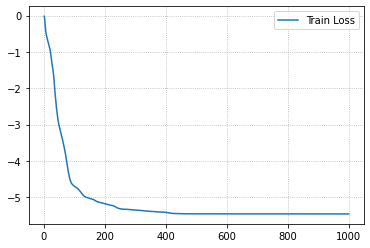

In [43]:
plt.grid(True, which="both", ls=":")
plt.plot(np.arange(1,n_epochs+1), np.log10(history), label="Train Loss")
plt.legend()

In [44]:
X_test = X_test.astype(np.float32)
X_test = torch.from_numpy(X_test)

y_test = y_test.astype(np.float32)
y_test = torch.from_numpy(y_test)

y_test_pred = my_network(X_test).reshape(-1,1)

In [45]:
y_test = y_test.reshape(-1,1)

In [46]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((y_test_pred - y_test)**2)/torch.mean(y_test**2)
print("Relative Error Test DNN: ", relative_error_test.detach().numpy()*100, "%")

Relative Error Test DNN:  0.002269582364533562 %


In [47]:
y_test_pred.shape

torch.Size([250, 1])

In [48]:
y_test.shape

torch.Size([250, 1])